In [140]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [141]:
dataset = 'model/point_history_classifier/point_history.csv'
model_save_path = 'model/point_history_classifier/point_history_classifier.hdf5'

# 分類数設定

In [142]:
NUM_CLASSES = 6

# 入力長

In [143]:
TIME_STEPS = 16
DIMENSION = 2

# 学習データ読み込み

In [144]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (TIME_STEPS * DIMENSION) + 1)))

In [145]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [147]:
use_lstm = False
model = None

if use_lstm:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Reshape((TIME_STEPS, DIMENSION), input_shape=(TIME_STEPS * DIMENSION, )), 
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(16, input_shape=[TIME_STEPS, DIMENSION]),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
else:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

In [148]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_12 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 24)                792       
_________________________________________________________________
dropout_13 (Dropout)         (None, 24)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                250       
_________________________________________________________________
dense_20 (Dense)             (None, 6)                 66        
Total params: 1,108
Trainable params: 1,108
Non-trainable params: 0
_________________________________________________________________


In [149]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [150]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [151]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
40/40 [==============================] - 0s 3ms/step - loss: 1.8091 - accuracy: 0.3098 - val_loss: 1.7662 - val_accuracy: 0.4228

Epoch 00001: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 2/1000
40/40 [==============================] - 0s 1ms/step - loss: 1.7674 - accuracy: 0.3667 - val_loss: 1.7382 - val_accuracy: 0.3922

Epoch 00002: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 3/1000
40/40 [==============================] - 0s 1ms/step - loss: 1.7431 - accuracy: 0.3581 - val_loss: 1.7104 - val_accuracy: 0.3465

Epoch 00003: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 4/1000
40/40 [==============================] - 0s 1ms/step - loss: 1.7208 - accuracy: 0.3467 - val_loss: 1.6794 - val_accuracy: 0.3429

Epoch 00004: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 5/1000
40/40 [==============================] - 0s 1ms/step - 

40/40 [==============================] - 0s 1ms/step - loss: 1.1465 - accuracy: 0.5914 - val_loss: 0.9428 - val_accuracy: 0.7748

Epoch 00036: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 37/1000
40/40 [==============================] - 0s 1ms/step - loss: 1.1359 - accuracy: 0.6046 - val_loss: 0.9290 - val_accuracy: 0.7790

Epoch 00037: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 38/1000
40/40 [==============================] - 0s 1ms/step - loss: 1.1337 - accuracy: 0.5940 - val_loss: 0.9167 - val_accuracy: 0.7766

Epoch 00038: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 39/1000
40/40 [==============================] - 0s 1ms/step - loss: 1.1255 - accuracy: 0.6034 - val_loss: 0.9066 - val_accuracy: 0.7784

Epoch 00039: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 40/1000
40/40 [==============================] - 0s 1ms/step - loss: 1.0

40/40 [==============================] - 0s 1ms/step - loss: 1.0019 - accuracy: 0.6423 - val_loss: 0.7230 - val_accuracy: 0.8120

Epoch 00071: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 72/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.9921 - accuracy: 0.6529 - val_loss: 0.7246 - val_accuracy: 0.8084

Epoch 00072: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 73/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.9784 - accuracy: 0.6487 - val_loss: 0.7176 - val_accuracy: 0.8114

Epoch 00073: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 74/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.9798 - accuracy: 0.6573 - val_loss: 0.7168 - val_accuracy: 0.8144

Epoch 00074: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 75/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.9

40/40 [==============================] - 0s 1ms/step - loss: 0.9408 - accuracy: 0.6627 - val_loss: 0.6528 - val_accuracy: 0.8180

Epoch 00106: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 107/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.9316 - accuracy: 0.6647 - val_loss: 0.6501 - val_accuracy: 0.8204

Epoch 00107: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 108/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.9268 - accuracy: 0.6661 - val_loss: 0.6525 - val_accuracy: 0.8162

Epoch 00108: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 109/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.9489 - accuracy: 0.6551 - val_loss: 0.6499 - val_accuracy: 0.8186

Epoch 00109: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 110/1000
40/40 [==============================] - 0s 1ms/step - loss:

40/40 [==============================] - 0s 1ms/step - loss: 0.8864 - accuracy: 0.6759 - val_loss: 0.6161 - val_accuracy: 0.8168

Epoch 00141: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 142/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.9150 - accuracy: 0.6759 - val_loss: 0.6191 - val_accuracy: 0.8126

Epoch 00142: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 143/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.8946 - accuracy: 0.6733 - val_loss: 0.6218 - val_accuracy: 0.8090

Epoch 00143: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 144/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.8914 - accuracy: 0.6794 - val_loss: 0.6151 - val_accuracy: 0.8120

Epoch 00144: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 145/1000
40/40 [==============================] - 0s 1ms/step - loss:

40/40 [==============================] - 0s 1ms/step - loss: 0.8783 - accuracy: 0.6788 - val_loss: 0.5982 - val_accuracy: 0.8108

Epoch 00176: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 177/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.8824 - accuracy: 0.6775 - val_loss: 0.5963 - val_accuracy: 0.8102

Epoch 00177: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 178/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.8826 - accuracy: 0.6792 - val_loss: 0.5932 - val_accuracy: 0.8168

Epoch 00178: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 179/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.8637 - accuracy: 0.6892 - val_loss: 0.5920 - val_accuracy: 0.8138

Epoch 00179: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 180/1000
40/40 [==============================] - 0s 1ms/step - loss:

40/40 [==============================] - 0s 1ms/step - loss: 0.8568 - accuracy: 0.6978 - val_loss: 0.5788 - val_accuracy: 0.8210

Epoch 00211: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 212/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.8552 - accuracy: 0.6948 - val_loss: 0.5803 - val_accuracy: 0.8186

Epoch 00212: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 213/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.8635 - accuracy: 0.6894 - val_loss: 0.5821 - val_accuracy: 0.8174

Epoch 00213: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 214/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.8708 - accuracy: 0.6878 - val_loss: 0.5843 - val_accuracy: 0.8192

Epoch 00214: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 215/1000
40/40 [==============================] - 0s 1ms/step - loss:

40/40 [==============================] - 0s 1ms/step - loss: 0.8442 - accuracy: 0.6946 - val_loss: 0.5695 - val_accuracy: 0.8168

Epoch 00246: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 247/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.8590 - accuracy: 0.6864 - val_loss: 0.5686 - val_accuracy: 0.8210

Epoch 00247: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 248/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.8360 - accuracy: 0.7008 - val_loss: 0.5652 - val_accuracy: 0.8216

Epoch 00248: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 249/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.8381 - accuracy: 0.6956 - val_loss: 0.5699 - val_accuracy: 0.8198

Epoch 00249: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 250/1000
40/40 [==============================] - 0s 1ms/step - loss:

40/40 [==============================] - 0s 1ms/step - loss: 0.8342 - accuracy: 0.6958 - val_loss: 0.5565 - val_accuracy: 0.8210

Epoch 00281: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 282/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.8259 - accuracy: 0.6984 - val_loss: 0.5571 - val_accuracy: 0.8216

Epoch 00282: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 283/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.8305 - accuracy: 0.7012 - val_loss: 0.5548 - val_accuracy: 0.8306

Epoch 00283: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 284/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.8316 - accuracy: 0.7030 - val_loss: 0.5525 - val_accuracy: 0.8300

Epoch 00284: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 285/1000
40/40 [==============================] - 0s 1ms/step - loss:

40/40 [==============================] - 0s 1ms/step - loss: 0.8228 - accuracy: 0.7042 - val_loss: 0.5509 - val_accuracy: 0.8282

Epoch 00316: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 317/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.8196 - accuracy: 0.7052 - val_loss: 0.5505 - val_accuracy: 0.8300

Epoch 00317: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 318/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.8113 - accuracy: 0.7070 - val_loss: 0.5508 - val_accuracy: 0.8270

Epoch 00318: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 319/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.8196 - accuracy: 0.7064 - val_loss: 0.5516 - val_accuracy: 0.8234

Epoch 00319: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 320/1000
40/40 [==============================] - 0s 1ms/step - loss:

In [152]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [153]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[7.2441924e-07 9.7850777e-02 2.0476289e-01 3.6792648e-01 3.0218501e-02
 2.9924065e-01]
3


# 混同行列

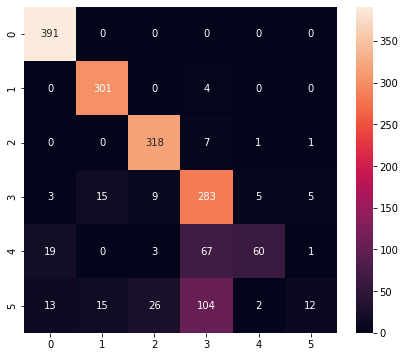

Classification Report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       391
           1       0.91      0.99      0.95       305
           2       0.89      0.97      0.93       327
           3       0.61      0.88      0.72       320
           4       0.88      0.40      0.55       150
           5       0.63      0.07      0.13       172

    accuracy                           0.82      1665
   macro avg       0.81      0.72      0.71      1665
weighted avg       0.82      0.82      0.78      1665



In [154]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [155]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)

In [156]:
tflite_save_path = 'model/point_history_classifier/point_history_classifier.tflite'

In [157]:
# モデルを変換(量子化
converter = tf.lite.TFLiteConverter.from_keras_model(model)  # converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\offic\AppData\Local\Temp\tmpsqdpu3f2\assets


INFO:tensorflow:Assets written to: C:\Users\offic\AppData\Local\Temp\tmpsqdpu3f2\assets


6400

# 推論テスト

In [158]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [159]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)

[{'name': 'input_7', 'index': 0, 'shape': array([ 1, 32]), 'shape_signature': array([-1, 32]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [160]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [161]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [162]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[7.2441918e-07 9.7850725e-02 2.0476297e-01 3.6792645e-01 3.0218499e-02
 2.9924068e-01]
3
